![QuestionOne](images/q1.png)

df(x)/dx = -2*x + 0.45*exp(0.45*x)
As shown below, the zero slope points are at x = [0.252020270830005, 7.91087352254695]


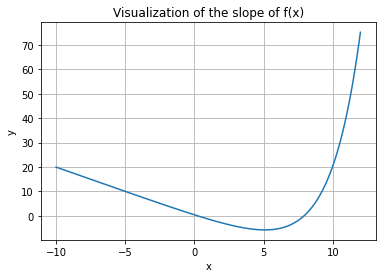

2) Using scipy, the roots are [0.25202027 7.91087352]


In [24]:
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sp
import numpy as np

x = sp.Symbol('x')
f = sp.exp(0.45*x)-sp.Pow(x,2)+5
d_f = sp.diff(f, x, 1)

sp.pprint(f"df(x)/dx = {d_f}")
print(f"As shown below, the zero slope points are at x = {sp.solve(d_f,x)}")

df = sp.lambdify(x, d_f)
x_ = np.linspace(-9.99,11.99,500)
y_ = [df(x_r) for x_r in x_]

plt.plot(x_, y_)
plt.title("Visualization of the slope of f(x)")
plt.xlabel("x"); plt.ylabel("y");
plt.grid()
plt.show()

# Only gives one root
# sol = optimize.root_scalar(df, bracket=[0, 7], method='brentq')
# sol.root

sol = optimize.root(df, [0, 7])
print(f"2) Using scipy, the roots are {sol.x}")


![QuestionTwo](images/q2.png)

The zeros are [1.77766259 3.00667383]


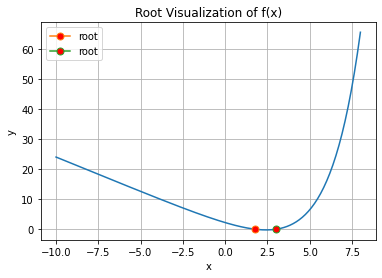

In [25]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

def f(x):
    return 1.2*np.exp(0.53*x)-2.3*x+1.01

x = np.linspace(-9.99,7.99,200)

sol = optimize.root(f, [0, 5])
print(f"The zeros are {sol.x}")

plt.plot(x, f(x))
for root in sol.x:
    plt.plot(
        root, 
        f(root), 
        marker="o", 
        markersize=7, 
        markerfacecolor="red", 
        label="root"
    )

plt.title("Root Visualization of f(x)")
plt.xlabel("x"); plt.ylabel("y");
plt.grid(); plt.legend(); plt.show();

![QuestionThree](images/q3.png)

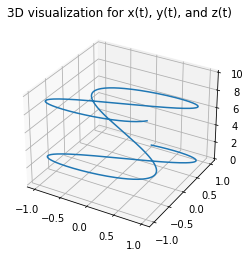

In [24]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0,10,500)
x_t = np.sin(2*t)
y_t = np.cos(t)
z_t = t

fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# plotting
ax.plot3D(x_t, y_t, z_t)
ax.set_title('3D visualization for x(t), y(t), and z(t)')
plt.show()

![QuestionFour](images/q4.png)

In [1]:
from scipy import integrate 
f = lambda x, y, z: x*y*z**2
f_volume = integrate.tplquad(f, 0, 3, lambda y: 0, lambda y: 1, lambda x, y: 0, lambda x, y: 1-y) 
print(f_volume) 

c:\Users\johns\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


(0.375, 7.350888240543878e-15)


![QuestionFive](images/q5.png)

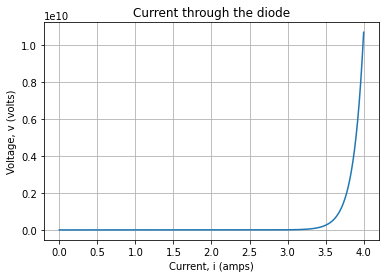

KeyboardInterrupt: 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

def i(v):
    return 0.001*(np.exp(7.5*v) - 1.1)
v = np.linspace(0,4,200)

plt.plot(v, i(v))
plt.title("Current through the diode")
plt.xlabel("Current, i (amps)")
plt.ylabel("Voltage, v (volts)")
plt.grid()
plt.show()

# vb = np.linspace(-10,10,200)
v, b = sp.symbols("v b")
# equation = sp.Eq(vb, 120*(0.001*(sp.exp(7.5*v) - 1.1)) + v)
sp.pprint(sp.solve(sp.Eq(b, 120*(0.001*(sp.exp(7.5*v) - 1.1)) + v), v))
